# Employee Exit Survey Data Cleaning
In this notebook we'll be working to clean some data consisting of exit surveys from employees of the Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Our goal will be to combine the two datasets effectively combining similar columns, and handling wrong and null values to make them more workable for further exploration.


## Data
The *TAFE exit survey* can be found on the Australian .gov.au website [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). This dataset has quite a few columns, here is a small selection of ones we will be working with:
- **Record ID**: An id used to identify the participant of the survey
- **Reason for ceasing employment**: The reason why the person's employment ended
- **LengthofServiceOverall. Overall Length of Service at Institute (in years)**: The length of the person's employment (in years)


The *DETE exit survey* can be found on the same website [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Here are a few of the columns from this dataset:
- **ID**: An id used to identify the participant of the survey
- **SeparationType**: The reason why the person's employment ended
- **Cease Date**: The year or month the person's employment ended
- **DETE Start Date**: The year the person began employment with the DETE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

## Initial Look
Let's explore the data sets to get a better idea of how to approach cleaning them.

We'll get started by looking at the DETE data first.

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

It looks like there are several columns with a lot of null values, the 'Classification' column is missing nearly half of its values, 'Business Unit' is missing most values and the last 5 only have a few rows with non-null data. Additionally most of the columns consist of the object datatype, with only one numeric column 'ID' and the rest being boolean.

Now we will look at an overview for the columns of the TAFE dataset.

In [5]:
dete_survey[['DETE Start Date', 'Role Start Date']].head(3)

,DETE Start Date,Role Start Date
0,1984,2004
1,Not Stated,Not Stated
2,2011,2011


Some of the values are also set as `'Not Stated'`, we will change these to `NaN`.

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

The TAFE data doesn't any nearly empty columns like the DETE data, but most are missing 15-20% and a few are missing nearly two-thirds. Each column appears to be named with a title followed by the corresponding survey question, we will shorten these to make them more legible in table format and easier to work with.

To summarize our initial look:
- Replace the 'Not Stated' values in the DETE data with NaN values
- Remove columns that we don't need to complete our analysis, particularly ones with a lot of missing values
- Rename columns to be consistent and concise

## Fixing Missing Data and Removing Unnecessary Columns
Now we will change the `Not Stated` values to `NaN`.

In [7]:
# We can do this simply by telling pandas.read_csv which values should be NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Confirm that it worked
dete_survey[['DETE Start Date', 'Role Start Date']].head(3)

,DETE Start Date,Role Start Date
0,1984.0,2004.0
1,NaN,NaN
2,2011.0,2011.0


And remove columns that won't be necessary for analysis.

In [8]:
dete_survey = dete_survey.drop(dete_survey.iloc[:, 28:49], axis=1)
tafe_survey = tafe_survey.drop(tafe_survey.iloc[:, 17:66], axis=1)

print(dete_survey.columns)
print(tafe_survey.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

## Column Renaming
First we'll clean up the DETE survey columns.

In [9]:
dete_survey.columns = dete_survey.columns.str.strip().str.lower().str.replace(' ', '_')
print(dete_survey.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Now we'll rename the TAFE survey to make them more readable and easier to work with.

In [10]:
print(tafe_survey.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [11]:
tafe_survey.columns = tafe_survey.columns.str.lower().str.strip().str.replace('contributing factors. ', '').str.replace(r'[\s\-]+', '_')
tafe_survey.columns = tafe_survey.columns.str.replace('career_move', 'career_move_to')

col_mapping = {
    'record_id': 'id',
    'reason_for_ceasing_employment': 'separationtype',
    'factors_maternity/family': 'maternity/family',
    'gender._what_is_your_gender?': 'gender',
    'currentage._current_age': 'age',
    'employment_type._employment_type': 'employment_status',
    'classification._classification': 'position',
    'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)': 'service',
    'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)': 'years_at_current_workplace'
} 

tafe_survey = tafe_survey.rename(col_mapping, axis=1)
print(tafe_survey.columns)

Index(['id', 'institute', 'workarea', 'cessation_year', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'career_move_to_self_employment', 'ill_health', 'maternity/family',
       'dissatisfaction', 'job_dissatisfaction', 'interpersonal_conflict',
       'study', 'travel', 'other', 'none', 'gender', 'age',
       'employment_status', 'position', 'service',
       'years_at_current_workplace'],
      dtype='object')


## Filtering Important Data
Now we'll separate out the the resignation data since we're most interested in these cases.

In [12]:
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
resignation_values = dete_survey['separationtype'].str.contains('Resignation*')
dete_resignations = dete_survey[resignation_values].copy()
tafe_resignations = tafe_survey[tafe_survey['separationtype'] == 'Resignation'].copy()

## Data Verification
We have to make sure that the data doesn't contain any major inconsistencies as a sanity check in order to verify that the data is not corrupted in some way.

Let's start by looking at the start date and cease date columns to make sure that they line up with what we would expect.

In [15]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

Some of these dates have both the month and year, while others have only the year. We can make this more consistent by removing the month from those that have it.

In [16]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.replace('(\d\d\/)', '').astype(np.float32)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

/home/harrison/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/harrison/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


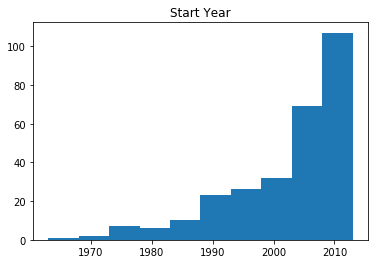

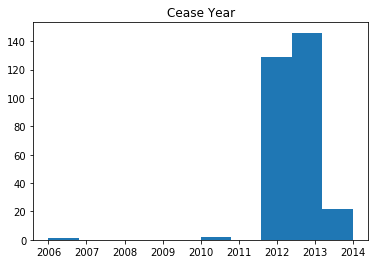

In [18]:
plt.hist(dete_resignations['dete_start_date'])
plt.title('Start Year')
plt.show()

plt.hist(dete_resignations['cease_date'])
plt.title('Cease Year')
plt.show()

All of the years look reasonable for the start dates and cease dates and show a distribution that makes sense regarding length of employment, and since we are not concerned with analyzing the results by year we will leave these be.

## Employee Dissatisfaction
We are interested in whether employees who worked at an institution for a short or long period of time are leaving due to job dissatisfaction or not. 

The TAFE data already contains a `service` column indicating how long the employee was at the institution, but we'll have to create a corresponding column for the DETE data.

In [19]:
dete_resignations['service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations[['dete_start_date', 'cease_date', 'service']].head()

,dete_start_date,cease_date,service
3,2005.0,2012.0,7.0
5,1994.0,2012.0,18.0
8,2009.0,2012.0,3.0
9,1997.0,2012.0,15.0
11,2009.0,2012.0,3.0


Next we will look for any contributing factors listed in each dataset that may correspond to employee dissatisfaction and create a new column indicating whether the employee was dissatisfied upon leaving or not.

In the TAFE survey, there are two columns that indicate dissatisfaction:

In [20]:
tafe_resignations['dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: dissatisfaction, dtype: int64

In [21]:
tafe_resignations['job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: job_dissatisfaction, dtype: int64

In [22]:
dissatisfaction = (~tafe_resignations['dissatisfaction'].isin(['-']))
job_dissatisfaction = (~tafe_resignations['job_dissatisfaction'].isin(['-']))

tafe_resignations['dissatisfied'] = (dissatisfaction | job_dissatisfaction)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

And in the DETE survey, there are several columns that may indicate dissatisfaction:

In [23]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining Datasets
We're finally ready to combine the datasets.

We'll add a column to each dataset indicating its source so that we know which set the row originally corresponded to once they are combined.

In [ ]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True, sort=False)

In [ ]:
combined.notnull().sum().sort_values()

torres_strait                            0
south_sea                                3
aboriginal                               7
disability                               8
nesb                                     9
business_unit                           32
classification                         161
region                                 265
role_start_date                        271
dete_start_date                        283
years_at_current_workplace             290
cease_date                             300
none_of_the_above                      311
workload                               311
work_life_balance                      311
traumatic_incident                     311
study/travel                           311
relocation                             311
employment_conditions                  311
lack_of_job_security                   311
lack_of_recognition                    311
physical_work_environment              311
dissatisfaction_with_the_department    311
interperson

There are still several columns with large numbers of null values, let's drop those.

In [ ]:
combined.dropna(thresh=500, axis=1, inplace=True)

# Clean the Service Column 

Next, we'll clean the `service` column and categorize employees according to the following definitions:

 - New: Less than 3 years in the workplace
 - Experienced: 3-6 years in the workplace
 - Established: 7-10 years in the workplace
 - Veteran: 11 or more years in the workplace
 
Our analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [ ]:
combined['service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [ ]:
# Extract service years from strings
combined['service'] = combined['service'].astype('str').str.extract('(\d+)').astype(np.float32)

# Check that the years were extracted properly
combined['service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: service, dtype: int64

In [ ]:
# Convert years of service to categories
def transform_service(year):
    if year >= 11:
        return "Veteran"
    elif 7 <= year < 11:
        return "Established"
    elif 3 <= year < 7:
        return "Experienced"
    elif pd.isnull(year):
        return np.nan
    else:
        return "New"
    
combined['service_cat'] = combined['service'].apply(transform_service)

# Check the update
combined['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Initial Analysis
Finally, we'll replace the missing values in the `dissatisfied` column with the most frequent value, `False`. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each `service_cat` group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, *not* the final analysis.

In [ ]:
# Confirm the values
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [ ]:
# Calculate the percentage of employees in each category that resigned due to dissatisfaction
dissatisfied_pct = combined.pivot_table(index='service_cat', values='dissatisfied') * 100

# Plot the results
dissatisfied_pct.plot(kind='barh')
plt.ylabel('')
plt.xlabel('Percentage')
plt.title('Percentage of Employees That Cited Dissatisfaction\nas a Reason for Resigning by Years of Experience at Company')
plt.show()